In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pickle

In [21]:
def plot_learning_curve(loss_record, title=''):
    ''' Plot learning curve of your DNN (train & dev loss) '''
    total_steps = len(loss_record['mean_train_loss'])
    x_1 = range(total_steps)
    x_2 = x_1[::len(loss_record['mean_train_loss']) // len(loss_record['mean_valid_loss'])]
    figure(figsize=(6, 4))
    plt.plot(x_1, loss_record['mean_train_loss'], c='tab:red', label='train')
    plt.plot(x_2, loss_record['mean_valid_loss'], c='tab:cyan', label='dev')
    plt.ylim(100, 500)
    plt.xlabel('Training steps')
    plt.ylabel('MSE loss')
    plt.title('Learning curve of {}'.format(title))
    plt.legend()
    plt.show()


In [15]:
with open('baseline/iml_var/pred_result_0','rb') as fr:
    loss_record = pickle.load(fr)
loss_record.keys()


dict_keys(['train', 'dev', 'mean_train_loss', 'mean_valid_loss'])

In [22]:
loss_record['mean_valid_loss'][:10]

[455.0012713701297,
 370.9981145614233,
 322.5224603017171,
 292.71474636518036,
 271.86961313761196,
 258.1207603369004,
 246.7327712079981,
 237.69581504662833,
 230.5407477335373,
 225.51496848693262]

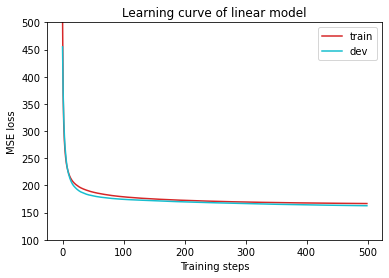

In [23]:
plot_learning_curve(loss_record, title='linear model')

In [58]:
import numpy as np
import pandas as pd
#df = pd.read_csv('models_ver2/preds_result')
df2= pd.read_csv('models_layer/preds_result_model_1layer_adddrop_e500')

In [25]:
df.describe()

,id,pred_y,target_y
count,59262.000000,59262.000000,59262.000000
mean,29630.500000,0.082061,-0.000103
std,17107.610163,0.525951,1.103294
min,0.000000,-13.993980,-17.611006
25%,14815.250000,0.045269,-0.152671
50%,29630.500000,0.060003,-0.006852
75%,44445.750000,0.197175,0.252893
max,59261.000000,6.363178,147.471310


In [39]:
df2.describe()

,id,pred_y,target_y
count,29631.00000,29631.000000,29631.000000
mean,14815.00000,0.007625,0.004254
std,8553.87725,0.201656,1.299509
min,0.00000,-1.669783,-16.654907
25%,7407.50000,-0.081561,-0.151649
50%,14815.00000,0.028720,-0.006852
75%,22222.50000,0.126478,0.253073
max,29630.00000,1.518776,147.471310


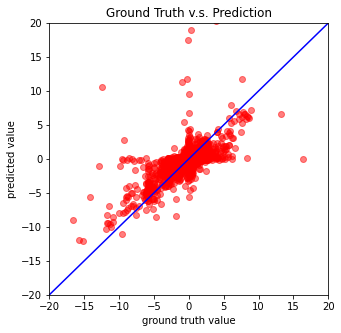

In [59]:
lim=20
preds=df2['pred_y']
targets=df2['target_y']
figure(figsize=(5, 5))
plt.scatter(targets, preds, c='r', alpha=0.5)
plt.plot([-20, lim], [-20, lim], c='b')
plt.xlim(-20, lim)
plt.ylim(-20, lim)
plt.xlabel('ground truth value')
plt.ylabel('predicted value')
plt.title('Ground Truth v.s. Prediction')
plt.show()